# Sentiment Analysis

In this project I'm building a Restaurant Review Sentiment analysis using a Machine Learning Model, using review from Trip Advisor and Google Reviews. For this project I'm using the following library :
* Pandas - For reading files and handling data
* NumPy - For Data manipulation and related operation
* Matplotlib - For Plotting graphs and visualization
* Seaborn - For better control over the Visualization

## Purpose of the Project:
*Q*. If there is a rating then why do we need to have Sentiment Analysis?  
*A*. 
* Having a sentiment analysis ML model for restaurant reviews alongside a rating system provides a more detailed understanding of customer feedback by categorizing reviews as positive, negative, or neutral, allowing for deeper insights into the reasons behind the ratings and helping identify specific areas for improvement.

* Rating system cannot can be sometimes be misleading by providing very low score because the customer did not like any one aspect of the service but liked the other aspects such cases can be better filtered using sentiment analysis.

So I'm building a Machine Learning model that can predict the sentiment of a review of a restuarant.

## Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
DATASET_PATH = './data_cleaned/'

# Read the csv file
google_df = pd.read_csv(f'{DATASET_PATH}/GoogleReview_data_cleaned.csv')
tripadvisor_df = pd.read_csv(f'{DATASET_PATH}/TripAdvisor_data_cleaned.csv')

In [3]:
google_df.sample(5) # View Sample rows

,Author,Rating,Review,Restaurant,Location
178880,Sharm Siva,3.0,"Nice place, had New Years breakfast there. Lov...",Antipodean Cafe,Petaling Jaya
146957,Nayd,5.0,"Excellent food and service, Islam was very pol...",BBQ NIGHTS,KL
133690,Sah H Ismail,5.0,Nice place for lunch,Minah Restaurant,Penang
87840,Jack Jansson,5.0,Best restaurant! Amazing food and super friend...,Haroo Korean Restaurant,Langkawi
189593,Leon Onn,5.0,Food was excellent. Variety is excellent. Serv...,Carnaval Churrascaria,Petaling Jaya


In [4]:
tripadvisor_df.sample(5) # View Sample rows

,Author,Title,Review,Rating,Dates,Restaurant,Location
30868,Mariejo444,Nice place for a drink!,Around the corner from the hotel a great plac...,4.0,Reviewed 7 July 2017,The Rabbit Hole,KL
105905,Lll6033,Good environment good food,Nice environment and interior which suitable f...,5.0,Reviewed 25 February 2022,Chop Tiang Bee Cafe and Restaurant,Melaka
72793,Khadijah3115,Great place,"The restaurant has a very relaxing, great ambi...",5.0,Reviewed 10 April 2018,Zest,Miri
68031,lsg181,Very good lunch sets to choose from RM16.90 on...,Famed xiao long pao restaurant it’s now offeri...,4.0,Reviewed 1 July 2020,Paradise restaurant kuala lumpar,KL
59318,anliza,Pricey,I think the croissant is superb. As for the c...,2.0,Reviewed 25 December 2018,Birch,KL


## Data Preprocessing:

In [7]:
# Check for missing values
print('Trip Advisor\n')
print(tripadvisor_df.isnull().sum())
print('\nGoogle Review\n')
print(google_df.isnull().sum())

Trip Advisor

Author        0
Title         0
Review        0
Rating        0
Dates         0
Restaurant    0
Location      0
dtype: int64

Google Review

Author        0
Rating        0
Review        0
Restaurant    0
Location      0
dtype: int64


In [8]:
# Data cleaning
tripadvisor_df.dropna(inplace=True)
google_df.dropna(inplace=True)

### Summary Statistics:

In [9]:
# Summary statistics for TripAdvisor
tripadvisor_df.describe()

,Rating
count,139764.000000
mean,4.230875
std,1.032482
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Summary statistics for Google Review
google_df.describe()

,Rating
count,222020.000000
mean,4.143037
std,1.128126
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Data Visualization:
Here we will visualize the dataset so that we can get a better understanding of the data we are dealing with and find meaning full insigths into the data.

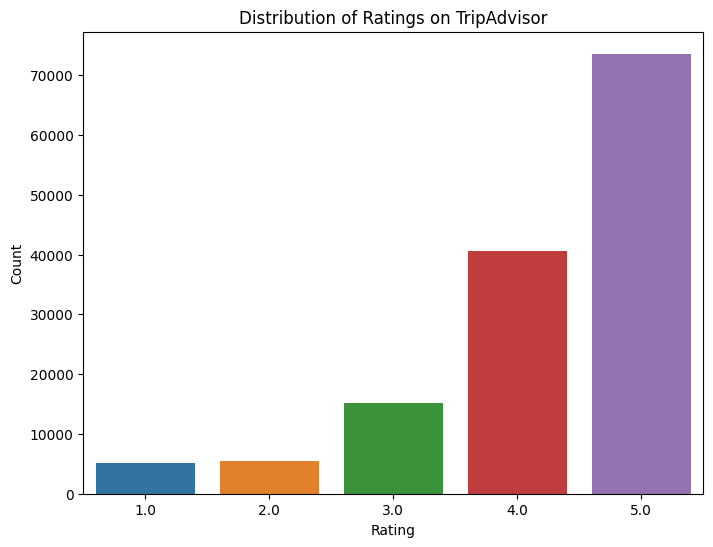

In [11]:
# Distribution of Ratings for TripAdvisor
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=tripadvisor_df)
plt.title('Distribution of Ratings on TripAdvisor')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

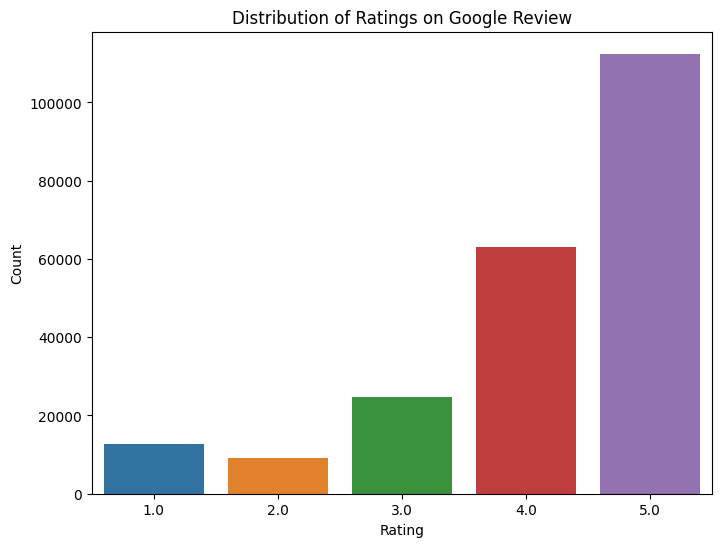

In [12]:
# Distribution of Ratings for Google Review
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=google_df)
plt.title('Distribution of Ratings on Google Review')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

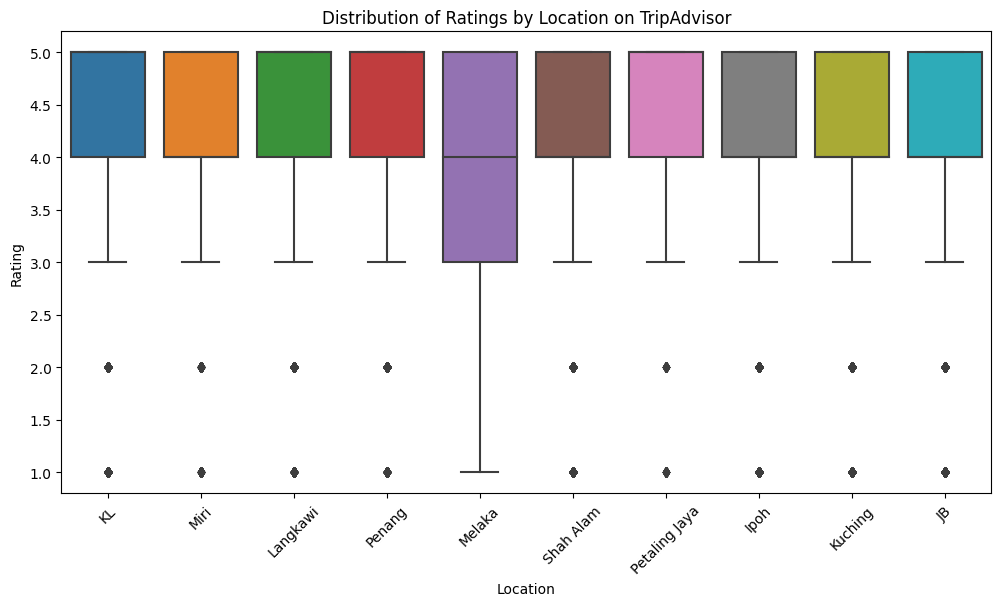

In [13]:
# Distribution of Ratings by Location for TripAdvisor
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Rating', data=tripadvisor_df)
plt.title('Distribution of Ratings by Location on TripAdvisor')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

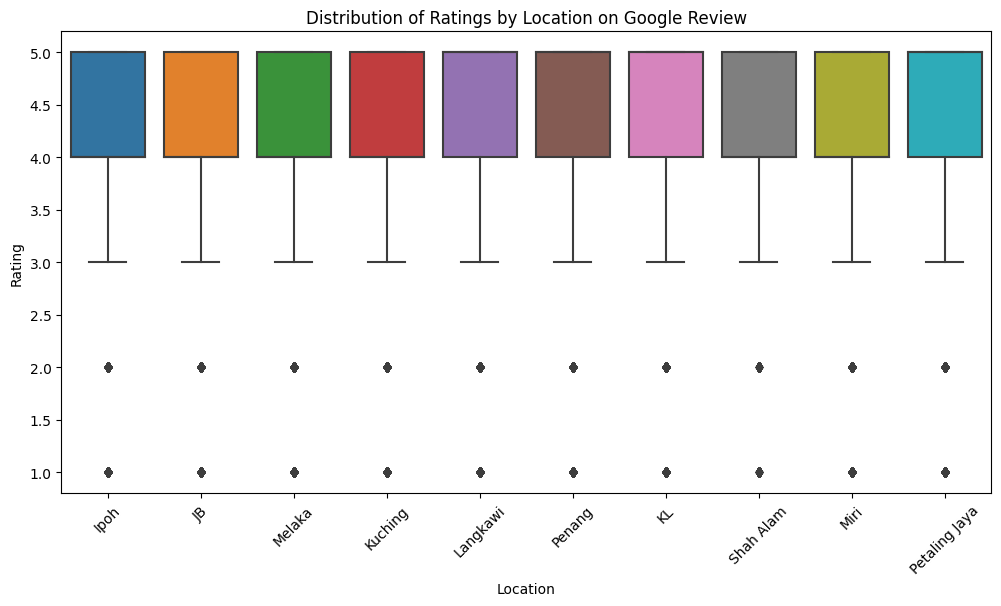

In [14]:
# Distribution of Ratings by Location for GoogleReviews
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Rating', data=google_df)
plt.title('Distribution of Ratings by Location on Google Review')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

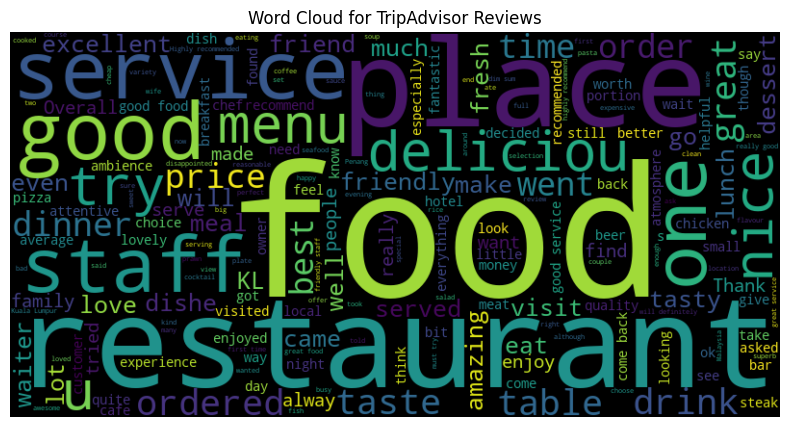

In [ ]:
# Word Cloud for TripAdvisor Reviews
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(tripadvisor_df['Review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for TripAdvisor Reviews')
plt.show()

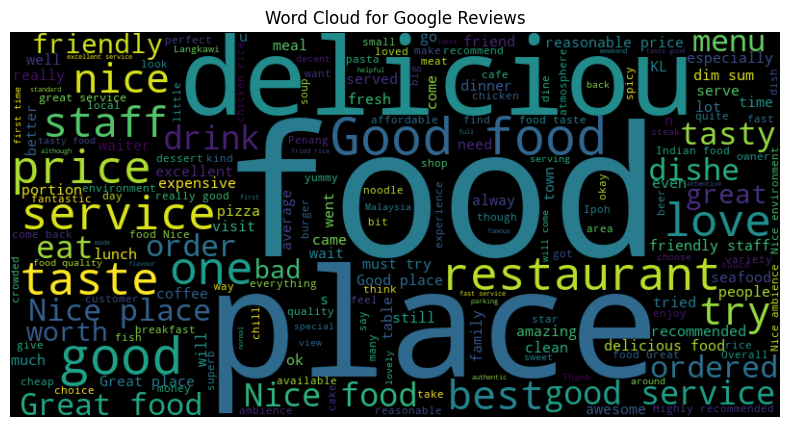

In [ ]:
# Word Cloud for Google Reviews
wordcloud = WordCloud(width=800, height=400).generate(' '.join(google_df['Review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Google Reviews')
plt.show()

In [15]:
# Calculate the length of reviews and create a new column
tripadvisor_df['Review Length'] = tripadvisor_df['Review'].apply(len)
google_df['Review Length'] = google_df['Review'].apply(len)

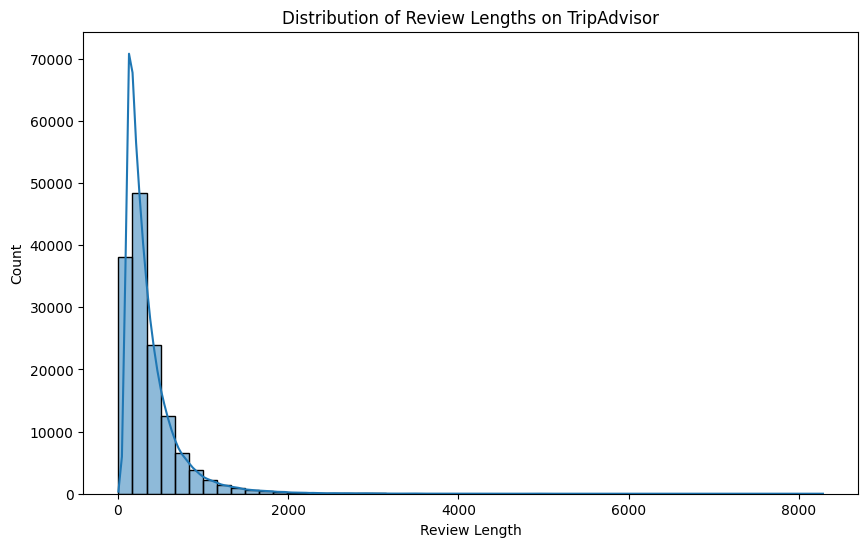

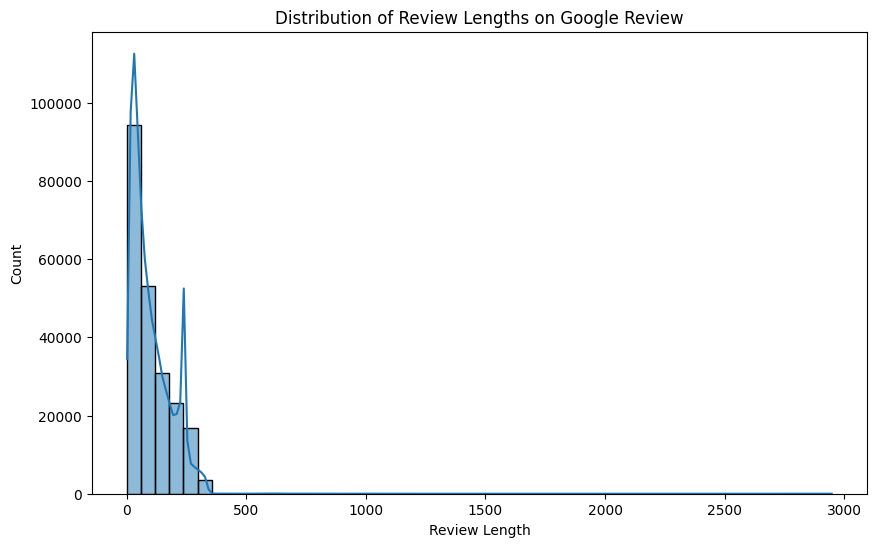

In [16]:
# Distribution of Review Lengths for TripAdvisor
plt.figure(figsize=(10, 6))
sns.histplot(data=tripadvisor_df, x='Review Length', bins=50, kde=True)
plt.title('Distribution of Review Lengths on TripAdvisor')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

# Distribution of Review Lengths for Google Review
plt.figure(figsize=(10, 6))
sns.histplot(data=google_df, x='Review Length', bins=50, kde=True)
plt.title('Distribution of Review Lengths on Google Review')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

## Sentiment Analysis

In [17]:
# Making Sure the columns are correct for merging
print('Trip Advisor Columns: \n')
print(tripadvisor_df.columns)

print('\nGoogle Columns: \n')
print(google_df.columns)

Trip Advisor Columns: 

Index(['Author', 'Title', 'Review', 'Rating', 'Dates', 'Restaurant',
       'Location', 'Review Length'],
      dtype='object')

Google Columns: 

Index(['Author', 'Rating', 'Review', 'Restaurant', 'Location',
       'Review Length'],
      dtype='object')


In [18]:
# Only taking the required columns
tripadvisor_df_filtered = tripadvisor_df[['Review', 'Rating']]
google_df_filtered = google_df[['Review', 'Rating']]

In [23]:
# Merge the two datasets based on common columns
combined_df = pd.concat([tripadvisor_df_filtered, google_df_filtered], ignore_index=True)
combined_df = combined_df.reset_index(drop=True)

In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361784 entries, 0 to 361783
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Review  361784 non-null  object 
 1   Rating  361784 non-null  float64
dtypes: float64(1), object(1)
memory usage: 5.5+ MB


In [25]:
combined_df.head()

,Review,Rating
0,"David, Thanga, Mikail and Chef Steven gave bri...",5.0
1,We visited for family celebration and as usual...,5.0
2,Perfect dinner after a long journey.After trav...,5.0
3,Had a great Tomahawk for me and hubby thanks t...,5.0
4,"Excellent ambient. Excellent service by David,...",5.0


In [26]:
ml_data = combined_df.copy()
ml_data.sample(10)

,Review,Rating
232144,"Staff were really friendly, the menu is great ...",5.0
303188,Always Good food!!,4.0
310888,Good,3.0
96915,As soon as travel restrictions eased we visite...,4.0
180154,Food is good! Definitely worth my time going t...,5.0
29203,Enjoyed a brunch for one while my husband was ...,5.0
331332,I pass by your restaurant often and I went the...,1.0
54558,I was here one evening to have a drink and I l...,4.0
221437,Halal and delicious. It really reminds me of t...,5.0
19842,"Great food , Great service\nI had a cream soup...",5.0


In [27]:
ml_data.to_csv('./ml_data.csv')

### Split the ratings into categories:

In [28]:
# Define the bins and labels for rating categories
bins = [0, 2, 3, 5]
labels = ['Negative', 'Neutral', 'Positive']

# Create a new column 'Rating_Category' based on the bins and labels
ml_data['Rating_Category'] = pd.cut(ml_data['Rating'], bins=bins, labels=labels)

In [29]:
ml_data.sample(10)

,Review,Rating,Rating_Category
170121,"Nice environment and Good taste. But, price qu...",4.0,Positive
149132,Cosy dine in place. Loved how they carried the...,5.0,Positive
65831,went to the go noodle outlet in Sunway Velocit...,2.0,Negative
96690,Me and a friend went for a quick bite on the g...,3.0,Neutral
55239,Frisky Goat is a neighbourhood cafe serving ex...,4.0,Positive
156743,The rice field is delicious but the price is a...,3.0,Neutral
144156,Their coffee is really nice compared to most p...,5.0,Positive
262870,Had only a drink here but it looked like a gre...,5.0,Positive
327264,"Good customer service, fast service and good food",5.0,Positive
209810,"I love the cha kueh there, has been eating it ...",4.0,Positive


### Split the Dataset into Training and Testing

In [30]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing
train_df, test_df = train_test_split(ml_data, test_size=0.2, random_state=42)

### Train the Model

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text data
X_train = tfidf_vectorizer.fit_transform(train_df['Review'])
X_test = tfidf_vectorizer.transform(test_df['Review'])

# Create the target variables
y_train = train_df['Rating_Category']
y_test = test_df['Rating_Category']

# Initialize and train a Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [35]:
# Evaluate the model on Training and Testing Data
print('Training\n')
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train, average='weighted')
print(f"Accuracy of the model: {accuracy_train:.2f}")
print(f'F1 Score: {f1_score_train:.2f}')
print(f'Classification Report: \n {classification_report(y_train, y_pred_train)}')

print('Testig\n')
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test, average='weighted')
print(f"Accuracy of the model: {accuracy_test:.2f}")
print(f'F1 Score: {f1_score_test:.2f}')
print(f'Classification Report: \n {classification_report(y_test, y_pred_test)}')

Training

Accuracy of the model: 0.87
F1 Score: 0.86
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.74      0.66      0.70     25671
     Neutral       0.57      0.29      0.39     32035
    Positive       0.90      0.97      0.94    231721

    accuracy                           0.87    289427
   macro avg       0.74      0.64      0.67    289427
weighted avg       0.85      0.87      0.86    289427

Testig

Accuracy of the model: 0.86
F1 Score: 0.85
Classification Report: 
               precision    recall  f1-score   support

    Negative       0.72      0.63      0.67      6533
     Neutral       0.50      0.26      0.35      7800
    Positive       0.90      0.97      0.93     58024

    accuracy                           0.86     72357
   macro avg       0.71      0.62      0.65     72357
weighted avg       0.84      0.86      0.85     72357



In [36]:
import pickle

In [37]:
# Save the TF-IDF vectorizer and model to files using pickle
with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf_vectorizer, tfidf_file)

with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [38]:
with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
    tfidf_vectorizer = pickle.load(tfidf_file)

with open('sentiment_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [39]:
def predict_rating_category(user_input, model=None, tfidf_vectorizer=None):
    """
    Predicts the rating category (Negative, Neutral, or Positive) for a given user input.

    Parameters:
    - model: A trained classification model (e.g., Multinomial Logistic Regression).
    - tfidf_vectorizer: A TF-IDF vectorizer fitted on the training data.
    - user_input: The user's restaurant review text.

    Returns:
    - predicted_category: The predicted rating category.
    """
    if model == None:
        try:
            with open('sentiment_model.pkl', 'rb') as model_file:
                model = pickle.load(model_file)
        except FileNotFoundError:
            print('Please make sure the sentiment_model.pkl is present inside the same level as this notebook')
        
    if tfidf_vectorizer == None:
        try:
            with open('tfidf_vectorizer.pkl', 'rb') as tfidf_file:
                tfidf_vectorizer = pickle.load(tfidf_file)
        except FileNotFoundError:
            print('Please make sure the tfidf_vectorizer.pkl is present inside the same level as this notebook')
      
    # Preprocess the user input using the same TF-IDF vectorizer
    user_input_tfidf = tfidf_vectorizer.transform([user_input])

    # Predict the rating category using the trained model
    predicted_class = model.predict(user_input_tfidf)
    probabilities = model.predict_proba(user_input_tfidf)[0]


    # Create a dictionary of probabilities for each category
    rating_categories = ['Negative', 'Neutral', 'Positive']
    probabilities_dict = {category: prob for category, prob in zip(rating_categories, probabilities)}
    # Map the predicted class label to the corresponding category
    # rating_categories = ['Negative', 'Neutral', 'Positive']
    # print(predicted_class[0])

    return predicted_class[0], probabilities_dict

In [40]:
user_input = "The food was terrible, and the service was slow."
predicted_category, probabilities = predict_rating_category(user_input, model, tfidf_vectorizer)
print(f"Predicted Rating Category: {predicted_category}")
print("Probabilities:")
for category, prob in probabilities.items():
    print(f"{category}: {prob:.4f}")

Predicted Rating Category: Negative
Probabilities:
Negative: 0.9807
Neutral: 0.0186
Positive: 0.0008


In [41]:

user_input = "The food was very good, and the service was excellent. Worth going to that restaurant"
predicted_category, probabilities = predict_rating_category(user_input)
print(f"Predicted Rating Category: {predicted_category}")
print("Probabilities:")
for category, prob in probabilities.items():
    print(f"{category}: {prob:.4f}")

Predicted Rating Category: Positive
Probabilities:
Negative: 0.0019
Neutral: 0.0049
Positive: 0.9932


In [42]:

user_input = "The food was ok"
predicted_category, probabilities = predict_rating_category(user_input, model, tfidf_vectorizer)
print(f"Predicted Rating Category: {predicted_category}")
print("Probabilities:")
for category, prob in probabilities.items():
    print(f"{category}: {prob:.4f}")

Predicted Rating Category: Neutral
Probabilities:
Negative: 0.0713
Neutral: 0.7035
Positive: 0.2252
